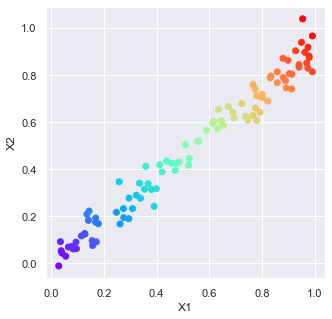

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

k=0.1
N=100
x1=np.random.rand(N)
x2=k*np.random.rand(100)+(1-k)*x1
x2=k*np.random.normal(0,0.5,size=N)+(1-k)*x1
X=np.vstack((x1,x2)).T
m=np.sqrt(x1**2+x2**2)

def plotData(X, ax=None, xlab=None, ylab=None, title=None, noline=False, fs=True):
    if ax==None:
        ax=plt.gca()
    ax.scatter(X[:,0], X[:,1], c=m, cmap='rainbow')

    minx=X.min()
    maxx=X.max()
    if not noline:
        C=np.cov(X.T)
        x=np.linspace(minx, maxx, 10)
        k=C[1,1]/C[0,0]
        k2=-1/k
        y=k*x
        middle=(minx+maxx)/2
        length=(maxx-minx)*0.1
        x2=np.linspace(middle,middle+length,10)
        y2=k2*x2+(k*middle - k2*middle)
        ax.plot(x,y,'r')
        ax.plot(x2,y2,'r')

    if fs:
        ax.axis([minx, maxx, minx, maxx])
    else:
        ax.axis([X[:,0].min(), X[:,0].max(),
                 X[:,1].min(), X[:,1].max()])
        
    if title:
        ax.set_title(title)
    if xlab:
        ax.set_xlabel(xlab)
    if ylab:
        ax.set_ylabel(ylab)

m=np.sqrt(X[:,0]**2+X[:,1]**2)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=m, cmap='rainbow')
plt.xlabel('X1');plt.ylabel('X2');

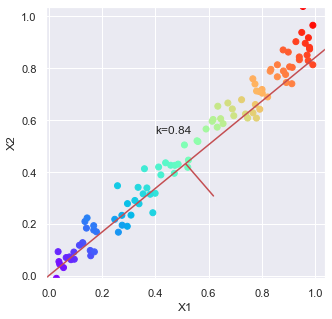

In [2]:
# Calculate the angle of maximum variance using the variances
# of variables, and calculate the reciprocal, k
var=X.var(axis=0)
k=var[1]/var[0]

# Plot the data and the direction of maximum variance, and the 
# orthogonal direction
plt.figure(figsize=(5,5))
plotData(X, xlab='X1', ylab='X2');
plt.text(0.4, 0.55, "k=%4.2f" % (k));

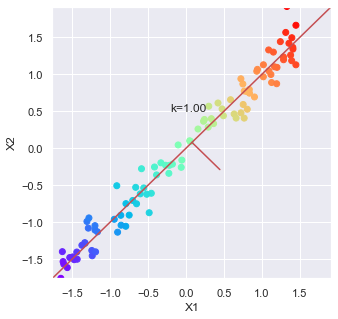

In [6]:
from sklearn.preprocessing import scale
plt.figure(figsize=(5,5))
Xs=scale(X)
plotData(Xs, xlab='X1', ylab='X2')
var=Xs.var(axis=0); k=var[1]/var[0]; plt.text(-0.2, 0.5, "k=%4.2f" % (k));

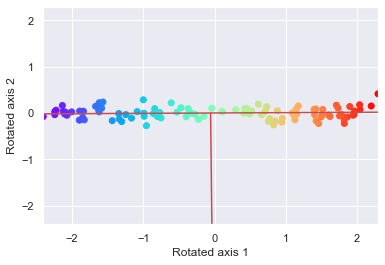

In [9]:
var=Xs.var(axis=0)
k=var[1]/var[0]

cost=var[0]/np.sqrt(var[0]**2 + var[1]**2) # Cosine of the rotation angle
sint=var[1]/np.sqrt(var[0]**2 + var[1]**2) # Sinus of the rotation angle
R=np.array([
    [cost, sint, 0], 
    [-sint, cost, 0],
    [0, 0, 1]])
X3d=np.vstack((Xs.T,np.ones(N))).T
Xr = (R @ X3d.T).T

plotData(Xr, xlab='Rotated axis 1', ylab='Rotated axis 2')

array([0.99260276, 0.00739724])

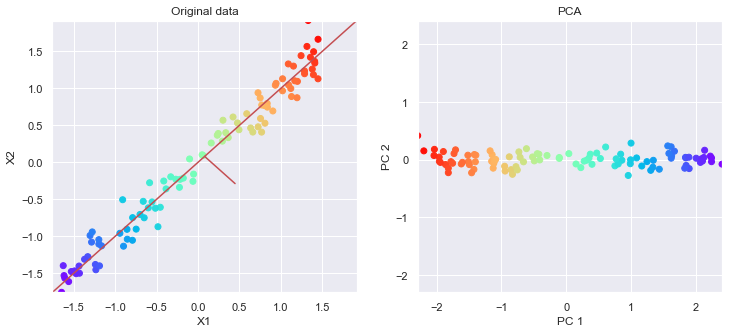

In [10]:
from sklearn.decomposition import PCA

# Perform PCA decomposition
pca=PCA(n_components=2)
Xp=pca.fit_transform(Xs)

# Plot the original data and transformed data side by side
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plotData(Xs, ax1, xlab='X1', ylab='X2', title='Original data')
plotData(Xp, ax2, xlab='PC 1', ylab='PC 2', title='PCA', noline=True)
pca.explained_variance_ratio_